     Player  CP  GT  C  DC  ST  RO  MRO  DH  RS  Score
0  Player 1   2   0  1   1   0   0    0   0  -4     -2
1  Player 2   2   1  1   0   0   1    1   1   2     24
2  Player 3   1   1  0   0   0   0    0   0   1      4


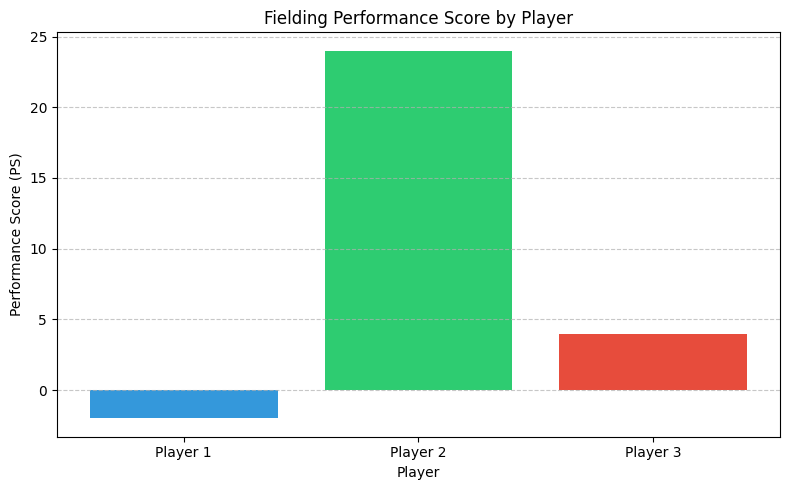

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = [
    (1, 2, 'Team A', 'Player 1', 1, 'Long On', 'Clean stop, quick return', 'Clean Pick', 'None', 0, 1, 7, 'Stadium X'),
    (1, 2, 'Team A', 'Player 2', 3, 'Point', 'Diving stop', 'Clean Pick', 'Good Throw', 0, 2, 7, 'Stadium X'),
    (1, 2, 'Team A', 'Player 1', 4, 'Cover', 'Simple catch taken', 'Catch', 'None', 0, 0, 8, 'Stadium X'),
    (1, 2, 'Team A', 'Player 3', 6, 'Mid-wicket', 'Fumble allows extra run', 'Fumble', 'None', 0, -1, 8, 'Stadium X'),
    (1, 2, 'Team A', 'Player 2', 2, 'Backward Point', 'Direct hit, run out', 'Clean Pick', 'Run Out', 1, 1, 9, 'Stadium X'),
    (1, 2, 'Team A', 'Player 1', 5, 'Deep Square', 'Drops a straightforward catch', 'Drop Catch', 'None', 0, -6, 10, 'Stadium X'),
    (1, 2, 'Team A', 'Player 3', 1, 'Fine Leg', 'Good chase, saves a boundary', 'Clean Pick', 'Good Throw', 0, 2, 11, 'Stadium X'),
    (1, 2, 'Team A', 'Player 2', 4, 'Cover', 'Missed run out opportunity', 'Fumble', 'Missed Run Out', 0, -1, 12, 'Stadium X'),
    (1, 2, 'Team A', 'Player 1', 6, 'Long Off', 'Clean stop', 'Clean Pick', 'None', 0, 1, 12, 'Stadium X'),
    (1, 2, 'Team A', 'Player 2', 3, 'Point', 'Takes a sharp catch', 'Catch', 'None', 0, 0, 13, 'Stadium X'),
]

cols = ['Match No.', 'Innings', 'Team', 'Player Name', 'Ballcount', 'Position',
        'Short Description', 'Pick', 'Throw', 'Direct Hit', 'Runs', 'Overcount', 'Venue']

df = pd.DataFrame(data, columns=cols)

# Score weights
w = {
    'cp': 1,
    'gt': 2,
    'c': 10,
    'dc': -10,
    'st': 8,
    'ro': 10,
    'mro': -5,
    'dh': 3
}

# Select players
players = ['Player 1', 'Player 2', 'Player 3']
result = []

for p in players:
    player_df = df[df['Player Name'] == p]
    cp = (player_df['Pick'] == 'Clean Pick').sum()
    gt = (player_df['Throw'] == 'Good Throw').sum()
    c = (player_df['Pick'] == 'Catch').sum()
    dc = (player_df['Pick'] == 'Drop Catch').sum()
    st = (player_df['Throw'] == 'Stumping').sum()
    ro = (player_df['Throw'] == 'Run Out').sum()
    mro = (player_df['Throw'] == 'Missed Run Out').sum()
    dh = (player_df['Direct Hit'] == 1).sum()
    rs = player_df['Runs'].sum()

    score = cp*w['cp'] + gt*w['gt'] + c*w['c'] + dc*w['dc'] + st*w['st'] + ro*w['ro'] + mro*w['mro'] + dh*w['dh'] + rs

    result.append({
        'Player': p,
        'CP': cp,
        'GT': gt,
        'C': c,
        'DC': dc,
        'ST': st,
        'RO': ro,
        'MRO': mro,
        'DH': dh,
        'RS': rs,
        'Score': score
    })

# Final performance table
res_df = pd.DataFrame(result)
print(res_df)

# 📊 Bar chart
plt.figure(figsize=(8, 5))
plt.bar(res_df['Player'], res_df['Score'], color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Fielding Performance Score by Player')
plt.xlabel('Player')
plt.ylabel('Performance Score (PS)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
